Introduction

In [11]:
# Imports
%matplotlib inline
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
from IPython.html.widgets import interactive, FloatSlider, fixed
from IPython.display import display

In [3]:
# functions

def nWin(n1,n_other,N):
    # return no winnings if any in n_other equals n1. this is an invalid scenario
    if n1 in n_other:
        return 0
        
    nowin = []
    for no in range(len(n_other)):
        # Mark numbers that are closer to n_other than n_1
        nowin = np.hstack((nowin,numCloser(n_other[no],n1,N)))
    nowin = np.unique(nowin)
    #pdb.set_trace()
    return N - len(nowin)

def numCloser(n1,n2,N):
    x1 = np.abs(np.arange(N) - n1)
    x2 = np.abs(np.arange(N) - n2)
    All = np.arange(N)
    return All[x1<=x2]

def closest(nps,N):
    P = len(nps)
    closescore = np.zeros([P,N])
    for p in range(P):
        closescore[p,:] = np.abs(np.arange(N) - nps[p])
    
    closests = np.argmin(closescore,axis=0)
    for n in range(N):
        temp1 = np.min(closescore[:,n])
        if sum(closescore[:,n] == temp1) != 1:
            closests[n] = -1
    
    return closests

In [4]:
# Plotting functions

def plot2player(pRED,pBLUE,N):
    N = np.int(N)
    ns = np.arange(N+1)
    ns = np.hstack((-1,ns))
    closests = closest([pRED,pBLUE],N)
    closests = np.hstack((-1,closests,-1))
    closests = np.matlib.repmat(closests,2,1)
    y = np.arange(2)

    plt.figure(figsize=(24,1))
    cmap = matplotlib.colors.ListedColormap(['gray','red','blue'])
    plt.pcolor(ns, y, closests, cmap=cmap)
    for n in range(N):
        plt.plot([n,n],[0,1],'k-')

    plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
    plt.xticks(np.arange(N)+.5,np.arange(N))
    plt.xlim([0,N])
    plt.show()

def plot3player(pRED,pBLUE,pGREEN,N):
    N = np.int(N)
    ns = np.arange(N+1)
    ns = np.hstack((-1,ns))
    closests = closest([pRED,pBLUE,pGREEN],N)
    closests = np.hstack((-1,closests,-1))
    closests = np.matlib.repmat(closests,2,1)
    y = np.arange(2)

    plt.figure(figsize=(24,1))
    cmap = matplotlib.colors.ListedColormap(['gray','red','blue','green'])
    plt.pcolor(ns, y, closests, cmap=cmap)
    for n in range(N):
        plt.plot([n,n],[0,1],'k-')

    plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
    plt.xticks(np.arange(N)+.5,np.arange(N))
    plt.xlim([0,N])
    plt.show()

def plot4player(pRED,pBLUE,pGREEN,pYELLOW,N):
    N = np.int(N)
    ns = np.arange(N+1)
    ns = np.hstack((-1,ns))
    closests = closest([pRED,pBLUE,pGREEN,pYELLOW],N)
    closests = np.hstack((-1,closests,-1))
    closests = np.matlib.repmat(closests,2,1)
    y = np.arange(2)

    plt.figure(figsize=(24,1))
    cmap = matplotlib.colors.ListedColormap(['gray','red','blue','green','yellow'])
    plt.pcolor(ns, y, closests, cmap=cmap)
    for n in range(N):
        plt.plot([n,n],[0,1],'k-')

    plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')
    plt.xticks(np.arange(N)+.5,np.arange(N))
    plt.xlim([0,N])
    plt.show()

# 2 players

In [5]:
# Experiment parameters
P = 2 #Number of players
N = 50 #Range of integers in the game

# Calculate the number of numbers controlled by each player for each possible combination of choices
W = np.zeros([N,N,2])
for n1 in range(N):
    for n2 in range(N):
        W[n1,n2,0] = nWin(n1,[n2],N)
        W[n1,n2,1] = nWin(n2,[n1],N)

# Calculate the best number choice for player 1
p1_bestres_eachn = np.zeros(N)
for n in range(N):
    p1_bestres_eachn[n] = N - np.max(np.squeeze(W[n,:,1]))
p1_best = np.argmax(p1_bestres_eachn)
p2_best = np.argmax(np.squeeze(W[p1_best,:,1]))
p2_bestW = W[p1_best,p2_best,1]
p1_bestW = W[p1_best,p2_best,0]

# Display results of strategically played game
print 'P1 chooses' , p1_best , '... Controls' , np.int(p1_bestW), '/', N, 'numbers'
print 'P2 chooses' , p2_best , '... Controls' , np.int(p2_bestW), '/', N, 'numbers'

P1 chooses 24 ... Controls 25 / 50 numbers
P2 chooses 25 ... Controls 25 / 50 numbers


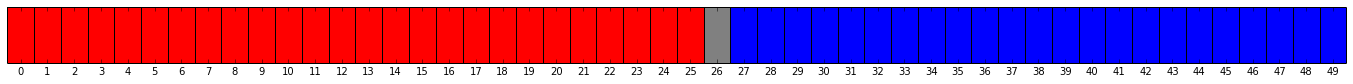

In [12]:
# Plot the numbers controlled by each player
w=interactive(plot2player,
              pRED  = FloatSlider(min = 0, max = N-1, step = 1, value = p1_best),
              pBLUE = FloatSlider(min = 0, max = N-1, step = 1, value = p2_best),
              N = fixed(N))
display(w)

# 3 players

In [13]:
N = 50
P = 3
W = np.zeros([N,N,N,P])
for n1 in range(N):
    for n2 in range(N):
        for n3 in range(N):
            W[n1,n2,n3,0] = nWin(n1,[n2,n3],N)
            W[n1,n2,n3,1] = nWin(n2,[n1,n3],N)
            W[n1,n2,n3,2] = nWin(n3,[n1,n2],N)

# Calculate the best choices for P2,3 for every possible choice by P1
p2bestN_1 = np.zeros(N)
p3bestN_1 = np.zeros(N)
p1bestW = np.zeros(N)
p2bestW = np.zeros(N)
p3bestW = np.zeros(N)
for n1 in range(N):
    # Calculate the best possible P2W for every n2
    p2_bestres_eachn = np.zeros(N)
    for n2 in range(N):
        c_bestp3 = np.argmax(np.squeeze(W[n1,n2,:,2]))
        p2_bestres_eachn[n2] = W[n1,n2,c_bestp3,1]
        
    # Choose best P2N, followed by P3N
    p2bestN_1[n1] = np.argmax(p2_bestres_eachn)
    p3bestN_1[n1] = np.argmax(np.squeeze(W[n1,p2bestN_1[n1],:,2]))
    
    # Calculate winnings for all players
    p1bestW[n1] = W[n1,p2bestN_1[n1],p3bestN_1[n1],0]
    p2bestW[n1] = W[n1,p2bestN_1[n1],p3bestN_1[n1],1]
    p3bestW[n1] = W[n1,p2bestN_1[n1],p3bestN_1[n1],2]


# Calculate the best option for player 1 and results
p1bestN = np.argmax(p1bestW)
p2bestN = p2bestN_1[p1bestN]
p3bestN = p3bestN_1[p1bestN]
p1bestW = W[p1bestN,p2bestN,p3bestN,0]
p2bestW = W[p1bestN,p2bestN,p3bestN,1]
p3bestW = W[p1bestN,p2bestN,p3bestN,2]


# Display optimal game
print 'P1 choice: ' , p1bestN , ' wins: ' , p1bestW
print 'P2 choice: ' , p2bestN , ' wins: ' , p2bestW
print 'P3 choice: ' , p3bestN , ' wins: ' , p3bestW

P1 choice:  37  wins:  25.0
P2 choice:  12.0  wins:  13.0
P3 choice:  11.0  wins:  12.0


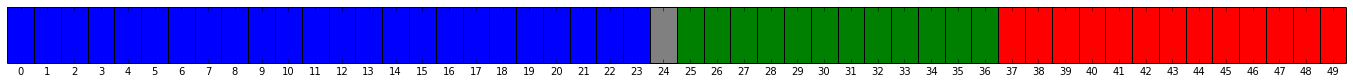

In [15]:
# Plot the numbers controlled by each player
w=interactive(plot3player,
              pRED  = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p1bestN),
              pBLUE = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p2bestN),
              pGREEN = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p3bestN),
              N = fixed(N))
display(w)

# 4 players

In [ ]:
N = 50
P = 4
W = np.zeros([N,N,N,N,P])
for n1 in range(N):
    for n2 in range(N):
        for n3 in range(N):
            for n4 in range(N):
                W[n1,n2,n3,n4,0] = nWin(n1,[n2,n3,n4],N)
                W[n1,n2,n3,n4,1] = nWin(n2,[n1,n3,n4],N)
                W[n1,n2,n3,n4,2] = nWin(n3,[n1,n2,n4],N)
                W[n1,n2,n3,n4,3] = nWin(n4,[n1,n2,n3],N)

# Calculate the best choices for P2,3 for every possible choice by P1
p2bestN_1 = np.zeros(N)
p3bestN_1 = np.zeros([N,N])
p4bestN_1 = np.zeros([N,N])
p1bestW = np.zeros([N,N])
p2bestW = np.zeros([N,N])
p3bestW = np.zeros([N,N])
p4bestW = np.zeros([N,N])

p1_bestres = np.zeros(N)
for n1 in range(N):
    p2_bestres = np.zeros(N)
    for n2 in range(N):
        # Calculate the best possible P3W for every n1,n2 and n3 choice
        p3_bestres = np.zeros(N)
        for n3 in range(N):
            p4_bestres = np.argmax(np.squeeze(W[n1,n2,n3,:,3]))
            p3_bestres[n3] = W[n1,n2,n3,p4_bestres,2]
        
        # Choose best P2N, followed by P3N
        # Now know what p3 and p4 would choose for every p1 and p2
        p3bestN_1[n1,n2] = np.argmax(p3_bestres)
        p4bestN_1[n1,n2] = np.argmax(np.squeeze(W[n1,n2,p3bestN_1[n1,n2],:,3]))
        
        # Calculate the optimal n2
        p2_bestres[n2] = W[n1,n2,p3bestN_1[n1,n2],p4bestN_1[n1,n2],1]
    
    p2bestN_1[n1] = np.argmax(p2_bestres)
    p1_bestres[n1] = W[n1,p2bestN_1[n1],p3bestN_1[n1,p2bestN_1[n1]],p4bestN_1[n1,p2bestN_1[n1]],0]

# Calculate the best option for player 1 and results
p1bestN = np.argmax(p1_bestres)
p2bestN = p2bestN_1[p1bestN]
p3bestN = p3bestN_1[p1bestN,p2bestN]
p4bestN = p4bestN_1[p1bestN,p2bestN]
p1bestW = W[p1bestN,p2bestN,p3bestN,p4bestN,0]
p2bestW = W[p1bestN,p2bestN,p3bestN,p4bestN,1]
p3bestW = W[p1bestN,p2bestN,p3bestN,p4bestN,2]
p4bestW = W[p1bestN,p2bestN,p3bestN,p4bestN,3]

# Display optimal game
print 'P1 choice: ' , p1bestN , ' wins: ' , p1bestW
print 'P2 choice: ' , p2bestN , ' wins: ' , p2bestW
print 'P3 choice: ' , p3bestN , ' wins: ' , p3bestW
print 'P4 choice: ' , p4bestN , ' wins: ' , p4bestW

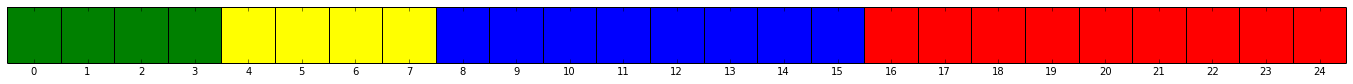

In [77]:
w=interactive(plot4player,
              pRED  = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p1bestN),
              pBLUE = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p2bestN),
              pGREEN = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p3bestN),
              pYELLOW = FloatSliderWidget(min = 0, max = N-1, step = 1, value = p4bestN),
              N = fixed(N))
display(w)